# Housing Prices & Venues Data Analysis of London

In this project we will be exploring the venues of London Boroughs and will also list down the top 3 venues for each borough.We will also analyse the property sale prices in the boroughs.

This will help analyze and make decision to choose a borough for renting/buying property and for opening up a new resturant.Exploring venues will also help in deciding the category of resturant.

Here we will be using 3 dataset:

**1.Borough Data**

This dataset contains the latitude and longitude data along with population and distance from center data for Boroughs.
We will be using the latitude and longitude data for Boroughs in London.




**2.Borough Code Mapping Data**

This dataset contains the Postal/zip code mapping to Boroughs of London. We will be using this data to map the boroughs to the code data.

**3.Borough Price Data**

This dataset contains the price data for housing sales for past fe years in London boroughs. We will be using the data for last 3 years only.

### Importing the libraries and the data sets

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e767730dbf5b480e80fe598713de7a0e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MLy9xnO42_a_jx4CvOwEvLheNcUUQSrDC90jlUH1V7QO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_e767730dbf5b480e80fe598713de7a0e.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-uuk25qeqlmllet',Key='lat_long_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

borough_data = pd.read_csv(body)
borough_data.head()


,Borough,Lat,Lng,Area,Population,Indian_population,Dist_from_center
0,Barking and Dagenham,51.574780,0.174410,13.93,194352.0,23144,22.265301
1,Barnet,51.527095,-0.066826,33.49,369088.0,35479,4.781269
2,Bexley,51.452078,0.069931,23.38,236687.0,8554,14.970919
3,Brent,51.609783,-0.194672,16.70,317264.0,74147,12.415363
4,Bromley,51.601511,-0.066365,57.97,317899.0,8494,11.390290


Extracting lat/long columns from borough_data table :

In [2]:
borough_data = borough_data[['Borough','Lat','Lng']]
borough_data['Borough'] = borough_data['Borough'].apply(lambda x: str(x).lower())
borough_data.head()

,Borough,Lat,Lng
0,barking and dagenham,51.574780,0.174410
1,barnet,51.527095,-0.066826
2,bexley,51.452078,0.069931
3,brent,51.609783,-0.194672
4,bromley,51.601511,-0.066365


In [3]:
borough_data.shape

(33, 3)

Loading the price dataset of boroughs:

In [4]:

body = client_e767730dbf5b480e80fe598713de7a0e.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-uuk25qeqlmllet',Key='price_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

price_data = pd.read_csv(body)
price_data.tail()


,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0
13548,2020-01-01,england,247355,E92000001,NaN,NaN,0


Adding separate column for 'year' to filter the rows based on past 3 years for our analysis:

In [5]:
price_data['year'] = price_data['date'].str.split('-').str[0]
price_data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1,1995


In [6]:
price_data.shape

(13549, 8)

Taking average of prices for past 3 years to analyse the recent trends in prices:

In [7]:
years = ['2019','2018','2017']
temp = price_data[price_data['year'].isin(years)]
temp = temp[['code','year','average_price']]
#temp.set_index('code',inplace=True)
temp = temp.groupby(['code']).mean()
temp.shape

(45, 1)

In [8]:
temp.tail(12)

,average_price
code,
E12000001,127892.805556
E12000002,159895.388889
E12000003,159446.972222
E12000004,187756.222222
E12000005,190599.083333
E12000006,288086.555556
E12000007,476629.027778
E12000008,320946.500000
E12000009,251902.888889


In [9]:
temp.drop(temp.tail(12).index,inplace=True)
temp.shape

(33, 1)

Loading the postal code to boroughs mapping data:

In [10]:

body = client_e767730dbf5b480e80fe598713de7a0e.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-uuk25qeqlmllet',Key='borough_code_mapping.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

borough_code_mapping = pd.read_csv(body)
borough_code_mapping = borough_code_mapping[['New code','Area name','Inner/ Outer London']]
borough_code_mapping.dropna(axis=0,inplace=True)
borough_code_mapping.head()


,New code,Area name,Inner/ Outer London
1,E09000001,City of London,Inner London
2,E09000002,Barking and Dagenham,Outer London
3,E09000003,Barnet,Outer London
4,E09000004,Bexley,Outer London
5,E09000005,Brent,Outer London


In [11]:
borough_code_mapping.shape

(33, 3)

In [12]:
borough_code_mapping['Area name'] = borough_code_mapping['Area name'].apply(lambda x:str(x).lower())
borough_code_mapping.head()

,New code,Area name,Inner/ Outer London
1,E09000001,city of london,Inner London
2,E09000002,barking and dagenham,Outer London
3,E09000003,barnet,Outer London
4,E09000004,bexley,Outer London
5,E09000005,brent,Outer London


In [13]:
borough_code_mapping.shape

(33, 3)

Merging the postal code data with the average prices for each Borough: 

In [14]:
df = borough_code_mapping.merge(temp,left_on ='New code',right_index = True,how = 'inner')

In [15]:
df.head()

,New code,Area name,Inner/ Outer London,average_price
1,E09000001,city of london,Inner London,807194.083333
2,E09000002,barking and dagenham,Outer London,294075.222222
3,E09000003,barnet,Outer London,530366.638889
4,E09000004,bexley,Outer London,338611.722222
5,E09000005,brent,Outer London,484907.027778


In [16]:
borough_data.head()

,Borough,Lat,Lng
0,barking and dagenham,51.574780,0.174410
1,barnet,51.527095,-0.066826
2,bexley,51.452078,0.069931
3,brent,51.609783,-0.194672
4,bromley,51.601511,-0.066365


In [17]:
borough_data.index

RangeIndex(start=0, stop=33, step=1)

We can see that few Boroughs have trailing spaces that need to be removed before merging the data

In [18]:
borough_data['Borough'] = borough_data['Borough'].apply(lambda x: x.strip())

In [19]:
borough_data.set_index('Borough',inplace=True)
borough_data.index

Index(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
       'camden', 'croydon', 'ealing', 'enfield', 'greenwich', 'hackney',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'tower hamlets', 'waltham forest', 'wandsworth', 'westminster',
       'city of london'],
      dtype='object', name='Borough')

Now we are merging the dataset with the boroughs lat/long data set to get out final dataset:

In [20]:
df1 = df.merge(borough_data,left_on = 'Area name',right_index = True,how='left')
df1.rename(columns = {'Area name':'Borough'},inplace=True)
df1.head()

,New code,Borough,Inner/ Outer London,average_price,Lat,Lng
1,E09000001,city of london,Inner London,807194.083333,51.520500,-0.097430
2,E09000002,barking and dagenham,Outer London,294075.222222,51.574780,0.174410
3,E09000003,barnet,Outer London,530366.638889,51.527095,-0.066826
4,E09000004,bexley,Outer London,338611.722222,51.452078,0.069931
5,E09000005,brent,Outer London,484907.027778,51.609783,-0.194672


Our final dataset is now clean and ready for drawing insights

### Data Exploration


Importing libraries for exploration:


In [21]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [22]:
!pip install folium
import folium 

     |████████████████████████████████| 94 kB 5.8 MB/s  eta 0:00:01


Using Nominatim from geocoder libraby to get the latitude and longitude for London

In [23]:
address = 'London, UK'

geolocator = Nominatim(user_agent="uk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London City are 51.5073219, -0.1276474.


#### Creating a map of London with all 33 Boroughs superimposed on top.


In [24]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df1['Lat'], df1['Lng'], df1['Borough'] ,df1['Inner/ Outer London']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

However, for illustration purposes, let's simplify the above map and segment and cluster only the inner
parts in London. So let's slice the original dataframe and create a new dataframe of the inner London data.


Exploring inner boroughs of London

In [25]:
inner_london = df1[df1['Inner/ Outer London'] == 'Inner London'].reset_index(drop=True)
inner_london

,New code,Borough,Inner/ Outer London,average_price,Lat,Lng
0,E09000001,city of london,Inner London,8.071941e+05,51.520500,-0.097430
1,E09000007,camden,Inner London,8.400970e+05,51.532360,-0.127960
2,E09000012,hackney,Inner London,5.505516e+05,51.545050,-0.055320
3,E09000013,hammersmith and fulham,Inner London,7.343581e+05,51.482600,-0.212880
4,E09000014,haringey,Inner London,5.525182e+05,51.589270,-0.106405
5,E09000019,islington,Inner London,6.449685e+05,51.532790,-0.106140
6,E09000020,kensington and chelsea,Inner London,1.318515e+06,51.522660,-0.207930
7,E09000022,lambeth,Inner London,5.127296e+05,51.490840,-0.111080
8,E09000023,lewisham,Inner London,4.108230e+05,51.459160,-0.012130
9,E09000025,newham,Inner London,3.617421e+05,51.519716,0.051479


In [26]:
address = 'city of london'

geolocator = Nominatim(user_agent="uk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of inner London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of inner London are 51.5156177, -0.0919983.


In [27]:
# create map of inner London using latitude and longitude values
map_inner_lon = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(inner_london['Lat'], inner_london['Lng'], inner_london['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_inner_lon)  
    
map_inner_lon

#### Define Foursquare Credentials and Version


In [28]:
CLIENT_ID = 'UW3HNNH0EIUCMCG3IBJCOU5CVT0WNSLDBGCV1WQ0KTKUUCIG' # my Foursquare ID
CLIENT_SECRET = 'OBMNU34BQM2WBEWM3HDEOTE151KXRZYA2DZUNGVUQKXGMDOC' # my Foursquare Secret
ACCESS_TOKEN = '0FLBYRDPTVPHUN3WO5H2QV3BOJJEGYL5CKZYMY3UZNBA4ZFF' # my FourSquare Access Token
VERSION = '20180605'
LIMIT = 100
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: UW3HNNH0EIUCMCG3IBJCOU5CVT0WNSLDBGCV1WQ0KTKUUCIG
CLIENT_SECRET:OBMNU34BQM2WBEWM3HDEOTE151KXRZYA2DZUNGVUQKXGMDOC


#### Let's explore the first Borough in our London dataframe.

In [29]:
borough_latitude = df1.loc[1, 'Lat'] # borough latitude value
borough_longitude = df1.loc[1, 'Lng'] # borough longitude value

borough_name = df1.loc[1, 'Borough'] # borough name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of city of london are 51.52050000000003, -0.09742999999997436.


#### Now, let's get the top 100 venues that are in City of London within a radius of 500 meters using Foursqaure API.
First, let's create the GET request URL. Name the URL **url**.
Lets explore the City of London and it's venues

In [30]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [31]:

df1.head()

,New code,Borough,Inner/ Outer London,average_price,Lat,Lng
1,E09000001,city of london,Inner London,807194.083333,51.520500,-0.097430
2,E09000002,barking and dagenham,Outer London,294075.222222,51.574780,0.174410
3,E09000003,barnet,Outer London,530366.638889,51.527095,-0.066826
4,E09000004,bexley,Outer London,338611.722222,51.452078,0.069931
5,E09000005,brent,Outer London,484907.027778,51.609783,-0.194672


In [32]:
london_venues = getNearbyVenues(names=df1['Borough'],
                                   latitudes=df1['Lat'],
                                   longitudes=df1['Lng']
                                  )

city of london
barking and dagenham
barnet
bexley
brent
bromley
camden
croydon
ealing
enfield
greenwich
hackney
hammersmith and fulham
haringey
harrow
havering
hillingdon
hounslow
islington
kensington and chelsea
kingston upon thames
lambeth
lewisham
merton
newham
redbridge
richmond upon thames
southwark
sutton
tower hamlets
waltham forest
wandsworth
westminster


In [33]:
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,city of london,51.5205,-0.09743,Barbican Centre,51.519855,-0.093942,Performing Arts Venue
1,city of london,51.5205,-0.09743,Dose Espresso,51.519553,-0.099406,Coffee Shop
2,city of london,51.5205,-0.09743,Barbican Art Gallery,51.519800,-0.093969,Art Gallery
3,city of london,51.5205,-0.09743,Original Bagel Bakery,51.522379,-0.097641,Bagel Shop
4,city of london,51.5205,-0.09743,the Charterhouse London,51.520850,-0.099305,Museum


In [34]:
print(london_venues.shape)
hist0 = london_venues.groupby('Neighborhood').count()
hist0.head()

(1182, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
barking and dagenham,21,21,21,21,21,21
barnet,56,56,56,56,56,56
bexley,4,4,4,4,4,4
brent,4,4,4,4,4,4
bromley,11,11,11,11,11,11


#### Number of venues in each Borough

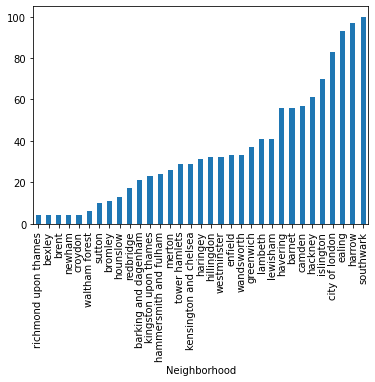

In [35]:
hist0.sort_values('Venue', inplace=True)

hist0.plot(y='Venue', kind='bar', legend=False)


In [36]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))


There are 222 uniques categories.


### One hot coding

In [37]:
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,city of london,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,city of london,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,city of london,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,city of london,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,city of london,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,barking and dagenham,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
1,barnet,0.000000,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.017857,0.000000,0.00000,0.017857,0.017857
2,bexley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
3,brent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
4,bromley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
5,camden,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
6,city of london,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.024096,0.000000,0.00,0.024096,0.000000,0.00000,0.000000,0.000000
7,croydon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000
8,ealing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010753,...,0.000000,0.010753,0.021505,0.010753,0.00,0.010753,0.000000,0.00000,0.000000,0.000000
9,enfield,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.030303


In [39]:
london_grouped.shape

(33, 223)

Using extracting the top 5 venues in the boroughs and listing them down :

In [40]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----barking and dagenham----
                 venue  freq
0          Pizza Place  0.10
1  American Restaurant  0.10
2       Clothing Store  0.10
3          Coffee Shop  0.10
4        Shopping Mall  0.05


----barnet----
         venue  freq
0  Coffee Shop  0.14
1          Pub  0.12
2         Café  0.07
3   Bagel Shop  0.04
4       Bakery  0.04


----bexley----
               venue  freq
0               Park  0.50
1              Trail  0.25
2        Golf Course  0.25
3  Afghan Restaurant  0.00
4    Nature Preserve  0.00


----brent----
                venue  freq
0  Chinese Restaurant  0.25
1          Playground  0.25
2         Golf Course  0.25
3        Tennis Court  0.25
4           Pet Store  0.00


----bromley----
                 venue  freq
0                  Pub  0.09
1               Hostel  0.09
2  Fried Chicken Joint  0.09
3                  Bar  0.09
4     Greek Restaurant  0.09


----camden----
            venue  freq
0            Café  0.07
1           Hotel  0.07
2  Breakfa

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Defining a function to get the 10 most common venue for each borough:

In [42]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,barking and dagenham,Pizza Place,American Restaurant,Clothing Store,Coffee Shop,Furniture / Home Store,Pharmacy,Grocery Store,Restaurant,Shopping Mall,Italian Restaurant
1,barnet,Coffee Shop,Pub,Café,Thrift / Vintage Store,Restaurant,Park,Bakery,Bagel Shop,Japanese Restaurant,Salon / Barbershop
2,bexley,Park,Trail,Golf Course,Escape Room,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
3,brent,Playground,Tennis Court,Chinese Restaurant,Golf Course,Yoga Studio,Escape Room,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
4,bromley,Pub,Train Station,Greek Restaurant,Mediterranean Restaurant,Fried Chicken Joint,Soccer Stadium,Sporting Goods Shop,Stadium,Supermarket,Bar


### Using K- means clustering to group the boroughs based on the types of venues nearby

In [43]:
from sklearn.cluster import KMeans

kclusters = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

kmeans.labels_[0:10]

array([1, 1, 3, 1, 1, 1, 1, 4, 1, 1], dtype=int32)

In [44]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = df1

london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

london_merged.head()

,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,E09000001,city of london,Inner London,807194.083333,51.520500,-0.097430,1,Food Truck,Coffee Shop,Gym / Fitness Center,Hotel,Italian Restaurant,Pub,French Restaurant,Café,Beer Bar,Indie Movie Theater
2,E09000002,barking and dagenham,Outer London,294075.222222,51.574780,0.174410,1,Pizza Place,American Restaurant,Clothing Store,Coffee Shop,Furniture / Home Store,Pharmacy,Grocery Store,Restaurant,Shopping Mall,Italian Restaurant
3,E09000003,barnet,Outer London,530366.638889,51.527095,-0.066826,1,Coffee Shop,Pub,Café,Thrift / Vintage Store,Restaurant,Park,Bakery,Bagel Shop,Japanese Restaurant,Salon / Barbershop
4,E09000004,bexley,Outer London,338611.722222,51.452078,0.069931,3,Park,Trail,Golf Course,Escape Room,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio
5,E09000005,brent,Outer London,484907.027778,51.609783,-0.194672,1,Playground,Tennis Court,Chinese Restaurant,Golf Course,Yoga Studio,Escape Room,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop


In [45]:
london_merged['Top 3 Venues'] = london_merged['1st Most Common Venue']+','+london_merged['2nd Most Common Venue']+','+london_merged['3rd Most Common Venue']

In [46]:
london_merged.head()

,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top 3 Venues
1,E09000001,city of london,Inner London,807194.083333,51.520500,-0.097430,1,Food Truck,Coffee Shop,Gym / Fitness Center,Hotel,Italian Restaurant,Pub,French Restaurant,Café,Beer Bar,Indie Movie Theater,"Food Truck,Coffee Shop,Gym / Fitness Center"
2,E09000002,barking and dagenham,Outer London,294075.222222,51.574780,0.174410,1,Pizza Place,American Restaurant,Clothing Store,Coffee Shop,Furniture / Home Store,Pharmacy,Grocery Store,Restaurant,Shopping Mall,Italian Restaurant,"Pizza Place,American Restaurant,Clothing Store"
3,E09000003,barnet,Outer London,530366.638889,51.527095,-0.066826,1,Coffee Shop,Pub,Café,Thrift / Vintage Store,Restaurant,Park,Bakery,Bagel Shop,Japanese Restaurant,Salon / Barbershop,"Coffee Shop,Pub,Café"
4,E09000004,bexley,Outer London,338611.722222,51.452078,0.069931,3,Park,Trail,Golf Course,Escape Room,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,"Park,Trail,Golf Course"
5,E09000005,brent,Outer London,484907.027778,51.609783,-0.194672,1,Playground,Tennis Court,Chinese Restaurant,Golf Course,Yoga Studio,Escape Room,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,"Playground,Tennis Court,Chinese Restaurant"


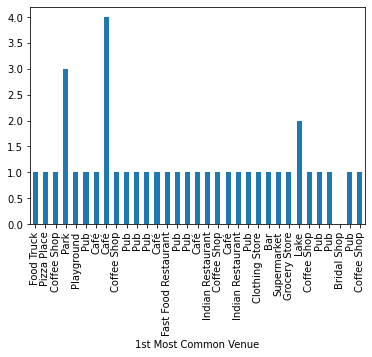

In [66]:
#london_merged.sort_values('Venue', inplace=True)

london_merged.plot(y='Cluster Labels',x='1st Most Common Venue', kind='bar', legend=False)


In [47]:
london_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   New code                33 non-null     object 
 1   Borough                 33 non-null     object 
 2   Inner/ Outer London     33 non-null     object 
 3   average_price           33 non-null     float64
 4   Lat                     33 non-null     float64
 5   Lng                     33 non-null     float64
 6   Cluster Labels          33 non-null     int32  
 7   1st Most Common Venue   33 non-null     object 
 8   2nd Most Common Venue   33 non-null     object 
 9   3rd Most Common Venue   33 non-null     object 
 10  4th Most Common Venue   33 non-null     object 
 11  5th Most Common Venue   33 non-null     object 
 12  6th Most Common Venue   33 non-null     object 
 13  7th Most Common Venue   33 non-null     object 
 14  8th Most Common Venue   33 non-null     obje

In [48]:
london_merged.shape

(33, 18)

In [49]:
london_merged.dropna(inplace = True)
london_merged.shape

(33, 18)

In [50]:
london_merged['Cluster Labels'] = london_merged['Cluster Labels'].astype(int)


In [51]:
london_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 33
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   New code                33 non-null     object 
 1   Borough                 33 non-null     object 
 2   Inner/ Outer London     33 non-null     object 
 3   average_price           33 non-null     float64
 4   Lat                     33 non-null     float64
 5   Lng                     33 non-null     float64
 6   Cluster Labels          33 non-null     int64  
 7   1st Most Common Venue   33 non-null     object 
 8   2nd Most Common Venue   33 non-null     object 
 9   3rd Most Common Venue   33 non-null     object 
 10  4th Most Common Venue   33 non-null     object 
 11  5th Most Common Venue   33 non-null     object 
 12  6th Most Common Venue   33 non-null     object 
 13  7th Most Common Venue   33 non-null     object 
 14  8th Most Common Venue   33 non-null     obje

### Using folium to plot the boroughs on the map of London along with top 3 venues in each borough and what part of London the borough belongs to:

In [52]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster,top3 in zip(london_merged['Lat'], london_merged['Lng'], london_merged['Borough'], london_merged['Cluster Labels'],london_merged['Top 3 Venues']):
    label = folium.Popup(str(poi) +' /Top 3 Venues: ' +top3 +' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

In [53]:
london_merged[london_merged['Cluster Labels'] == 0]


,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top 3 Venues
31,E09000031,waltham forest,Outer London,435879.861111,51.630613,-0.016275,0,Bridal Shop,Golf Driving Range,Food,Construction & Landscaping,Rugby Pitch,Park,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,"Bridal Shop,Golf Driving Range,Food"


In [54]:
c1 = london_merged[london_merged['Cluster Labels'] == 0]
c1.groupby('1st Most Common Venue').count()

,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top 3 Venues
1st Most Common Venue,,,,,,,,,,,,,,,,,
Bridal Shop,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### From above it is clear that most popular categories for a venue in cluster 0 are Pubs and Coffee shops.

In [55]:
london_merged[london_merged['Cluster Labels'] == 1]


,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top 3 Venues
1,E09000001,city of london,Inner London,8.071941e+05,51.520500,-0.097430,1,Food Truck,Coffee Shop,Gym / Fitness Center,Hotel,Italian Restaurant,Pub,French Restaurant,Café,Beer Bar,Indie Movie Theater,"Food Truck,Coffee Shop,Gym / Fitness Center"
2,E09000002,barking and dagenham,Outer London,2.940752e+05,51.574780,0.174410,1,Pizza Place,American Restaurant,Clothing Store,Coffee Shop,Furniture / Home Store,Pharmacy,Grocery Store,Restaurant,Shopping Mall,Italian Restaurant,"Pizza Place,American Restaurant,Clothing Store"
3,E09000003,barnet,Outer London,5.303666e+05,51.527095,-0.066826,1,Coffee Shop,Pub,Café,Thrift / Vintage Store,Restaurant,Park,Bakery,Bagel Shop,Japanese Restaurant,Salon / Barbershop,"Coffee Shop,Pub,Café"
5,E09000005,brent,Outer London,4.849070e+05,51.609783,-0.194672,1,Playground,Tennis Court,Chinese Restaurant,Golf Course,Yoga Studio,Escape Room,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,"Playground,Tennis Court,Chinese Restaurant"
6,E09000006,bromley,Outer London,4.407763e+05,51.601511,-0.066365,1,Pub,Train Station,Greek Restaurant,Mediterranean Restaurant,Fried Chicken Joint,Soccer Stadium,Sporting Goods Shop,Stadium,Supermarket,Bar,"Pub,Train Station,Greek Restaurant"
7,E09000007,camden,Inner London,8.400970e+05,51.532360,-0.127960,1,Café,Hotel,Breakfast Spot,Coffee Shop,Restaurant,Gastropub,Train Station,Bar,Chinese Restaurant,Chocolate Shop,"Café,Hotel,Breakfast Spot"
9,E09000009,ealing,Outer London,4.790814e+05,51.514060,-0.300730,1,Coffee Shop,Pub,Clothing Store,Bus Stop,Platform,Italian Restaurant,Burger Joint,Grocery Store,Bakery,Café,"Coffee Shop,Pub,Clothing Store"
10,E09000010,enfield,Outer London,3.952489e+05,51.540024,-0.077502,1,Pub,Café,Cocktail Bar,Lounge,Coffee Shop,Restaurant,Middle Eastern Restaurant,Photography Studio,Canal,Plaza,"Pub,Café,Cocktail Bar"
11,E09000011,greenwich,Outer London,3.905098e+05,51.484540,0.002750,1,Pub,Grocery Store,Indian Restaurant,Coffee Shop,Pier,Turkish Restaurant,Café,Sculpture Garden,South Indian Restaurant,English Restaurant,"Pub,Grocery Store,Indian Restaurant"
12,E09000012,hackney,Inner London,5.505516e+05,51.545050,-0.055320,1,Pub,Coffee Shop,Cocktail Bar,Bakery,Brewery,Organic Grocery,Café,Modern European Restaurant,Hotel,Clothing Store,"Pub,Coffee Shop,Cocktail Bar"


In [56]:
london_merged[london_merged['Cluster Labels'] == 2]


,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top 3 Venues
27,E09000027,richmond upon thames,Outer London,656097.222222,51.48027,-0.23754,2,Lake,Recreation Center,Nature Preserve,Yoga Studio,English Restaurant,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,"Lake,Recreation Center,Nature Preserve"


In [57]:
london_merged[london_merged['Cluster Labels'] == 3]


,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top 3 Venues
4,E09000004,bexley,Outer London,338611.722222,51.452078,0.069931,3,Park,Trail,Golf Course,Escape Room,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Film Studio,"Park,Trail,Golf Course"


In [58]:
london_merged[london_merged['Cluster Labels'] == 4]


,New code,Borough,Inner/ Outer London,average_price,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Top 3 Venues
8,E09000008,croydon,Outer London,369401.222222,51.59348,-0.08342,4,Café,Fast Food Restaurant,Park,Yoga Studio,Creperie,Food,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,"Café,Fast Food Restaurant,Park"


In [59]:
df1.head()

,New code,Borough,Inner/ Outer London,average_price,Lat,Lng
1,E09000001,city of london,Inner London,807194.083333,51.520500,-0.097430
2,E09000002,barking and dagenham,Outer London,294075.222222,51.574780,0.174410
3,E09000003,barnet,Outer London,530366.638889,51.527095,-0.066826
4,E09000004,bexley,Outer London,338611.722222,51.452078,0.069931
5,E09000005,brent,Outer London,484907.027778,51.609783,-0.194672


### Now we can visualize the average property prices for each borough

In [60]:
import matplotlib.pyplot as plt

In [61]:
hist = df1[['Borough','average_price']].reset_index(drop=True)
hist = hist.set_index('Borough')
hist.head()

,average_price
Borough,
city of london,807194.083333
barking and dagenham,294075.222222
barnet,530366.638889
bexley,338611.722222
brent,484907.027778


### Visualizing using Bar Plot

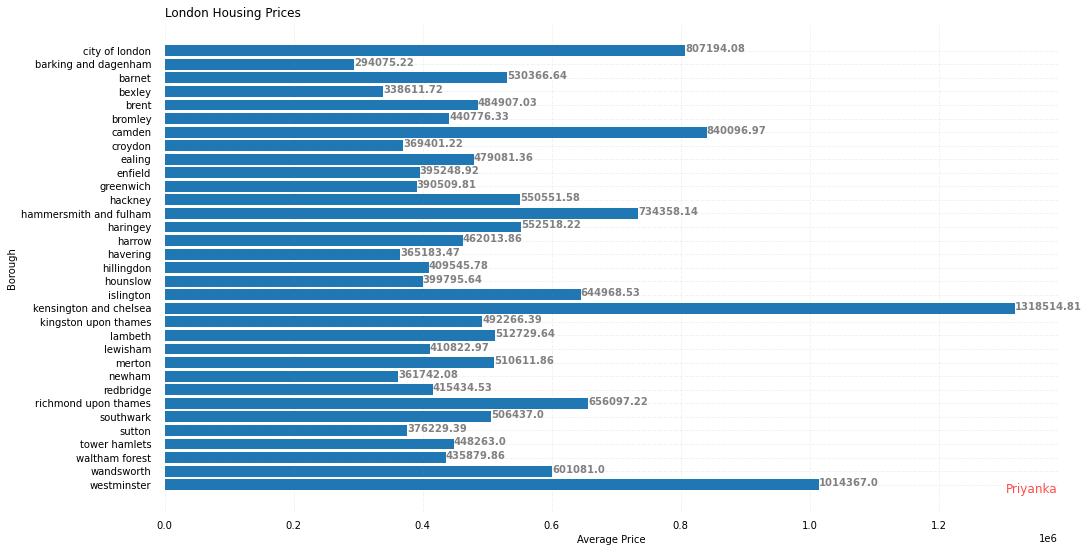

In [68]:
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(df1['Borough'], df1['average_price'])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('London Housing Prices',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Priyanka', fontsize = 12,
         color ='red', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.xlabel('Average Price')
plt.ylabel('Borough')
plt.show()


##### We can analyse Boroughs in London in three categories:

**1. High Class Boroughs (~ 750,000+):**

-Kensinghton and Chelsea

-Westminster

-Camden

**2.Mid-Class Boroughs(300,000 – 750,000):**

-Barnet

-Islington

-Wandsworth

**3. Lower Class Boroughs (200,000 – 300,000):**

-Barking and Dagenham

-Bexley

-Havering

On the basis of our budget one can easily choose among the Price-category of the Boroughs. 

And on the basis of venue analysis we can come to a conclusion as to what category will benefit us the most in respective borough.

### Discussion


London is one of the largest metropolises in the world where over 9.3 million people live and it has a population density of 5,701 people per square kilometer. I’ve decided to use London in my project. The city is divided into local authority districts that make up the ceremonial county of Greater London; each is governed by a London borough council.
I used the Kmeans algorithm as part of this clustering study. I set the optimum k value to 5. For more detailed and accurate guidance, the data set can be expanded and the details of the neighborhood or street can also be drilled.


I also performed data analysis through this information by adding the coordinates of districts and home sales price averages as static data on GitHub. In future studies, these data can also be accessed dynamically from specific platforms or packages.


I ended the study by visualizing the data and clustering information on the London map. In future studies, web or telephone applications can be carried out to direct investors.


### Conclusion


As a result, people are turning to big cities to start a business or work. For this reason, people can achieve better outcomes through their access to the platforms where such information is provided.


Not only for investors but also city managers can manage the city more regularly by using similar data analysis types or platforms.


 **References**
 
 
[1] London — Wikipedia

[2] London Boroughs House Price, Crime and Population data — Kaggle

[3] Foursquare API

[4] Google Map
